<a href="https://colab.research.google.com/github/mz-zarei/MNIST_Classification/blob/main/CNN(Part2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
############ Part 3.1: Checking generalization (Rotation)####################
#############################################################################
batch_size = 128


import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from PIL import Image 
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from sklearn.model_selection import train_test_split
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

############# Loaading Data
(X_train_val, y_train_val), (X_test, y_test) = mnist.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.16666666, random_state = 42)

print('train dataset: ', X_train.shape, y_train.shape,X_train[0].shape, y_train)
print('test dataset: ', X_test.shape, y_test.shape,)
print('Validation dataset: ',X_val.shape, y_val.shape,)




############# function for resizing images default 32*32

def resize_image (X, new_size = (32,32)):
    X_resized = []
    for i in range(len(X)):
        
        im = Image.fromarray(X[i])
        im = im.resize(new_size)
        
        X_resized.append(np.asarray(im))
        
    X_resized = np.array(X_resized)
    return (X_resized)



############## Resizing
W = 32
H = 32
X_train_resized = resize_image(X_train, new_size = (W,H)) /255
X_test_resized = resize_image(X_test, new_size = (W,H)) /255
X_val_resized = resize_image(X_val, new_size = (W,H)) /255

print(X_train_resized.shape)




############## one-hot-encoding of y labels

nb_classes = 10    # 10 labels 

#y_train_encoded = np.eye(nb_classes)[y_train]
#y_test_encoded = np.eye(nb_classes)[y_test]

y_train_encoded = to_categorical(y_train, nb_classes)
y_test_encoded = to_categorical(y_test, nb_classes)
y_val_encoded = to_categorical(y_val, nb_classes)

print(y_train[0], y_train_encoded[0])





############# Reshaping inputs 


X_train_resized_reshaped = X_train_resized.reshape(50000,W,H,1)
X_val_resized_reshaped = X_val_resized.reshape(10000,W,H,1)

print(X_train_resized.shape)
print(X_train_resized_reshaped.shape)



################ Creating VGG11 CNN ###########################################
def creat_vgg11(nb_classes = 10, W=32, H=32):
  model = Sequential()

  model.add(Conv2D(32, kernel_size=3, padding='same', activation ='relu', input_shape=(W,H,1)))
  model.add(MaxPooling2D(pool_size=(2, 2), strides = 2))

  model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2), strides = 2))

  model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
  model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2), strides = 2))

  model.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))
  model.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2), strides = 2))

  model.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))
  model.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2), strides = 2))

  model.add(Flatten())

  model.add(Dense(512, activation='relu'))
  model.add(Dense(512, activation='relu'))
  model.add(Dense(nb_classes, activation='softmax'))

  return (model)


###############   Train and evaluate the model
X = X_train_resized_reshaped 
X_v = X_val_resized_reshaped 

y = y_train_encoded
y_t = y_test_encoded
y_v = y_val_encoded



def rotate_image (X, rot_degree):
    
    X_rotated = []
    for i in range(len(X)):
        
        im = Image.fromarray(X[i])
        im = im.rotate(rot_degree)
        
        X_rotated.append(np.asarray(im))
        
    X_rotated = np.array(X_rotated)
    return (X_rotated)



degree_list = np.linspace(-40, 40, num = 9)
rot_test_acc = []
rot_test_loss = []


for degree in degree_list:
  X_test_rotated = rotate_image(X_test_resized, degree)
  X_test_rotated_reshaped = X_test_rotated.reshape(10000,W,H,1)
  X_t = X_test_rotated_reshaped 


  keras.backend.clear_session()
  CNN = creat_vgg11()
  CNN.compile(loss = 'categorical_crossentropy',
                    optimizer = 'adam', #keras.optimizers.Adadelta(),
                    metrics = ['accuracy'])

  history = CNN.fit(X, y, batch_size = batch_size, epochs = 5,
                verbose = 1, validation_data=(X_v, y_v))




  score = CNN.evaluate(X_t, y_t, verbose=0)
  print('Test loss:', score[0])
  rot_test_loss.append(score[0])

  print('Test accuracy:', score[1])
  rot_test_acc.append(score[1])


Using TensorFlow backend.


Instructions for updating:
non-resource variables are not supported in the long term
11493376/11490434 [==============================] - 1s 0us/step
train dataset:  (50000, 28, 28) (50000,) (28, 28) [8 5 1 ... 0 0 4]
test dataset:  (10000, 28, 28) (10000,)
Validation dataset:  (10000, 28, 28) (10000,)
(50000, 32, 32)
8 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
(50000, 32, 32)
(50000, 32, 32, 1)








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/5





50000/50000 [==============================] - 12s 244us/step - loss: 0.3972 - acc: 0.8629 - val_loss: 0.0778 - val_acc: 0.9772
Epoch 2/5
50000/50000 [==============================] - 4s 80us/step - loss: 0.0708 - acc: 0.9788 - val_loss: 0.0719 - val_acc: 0.9799
Epoch 3/5
50000/50000 [==============================] - 4s 80us/step - loss: 0.0526 - acc: 0.9852 - val_loss: 0.0528 - val_acc: 0.9850
Epoch 4/5
50000/50000 [==================

[0.5529, 0.8131, 0.9262, 0.9744, 0.9907, 0.9809, 0.9415, 0.7848, 0.6813]


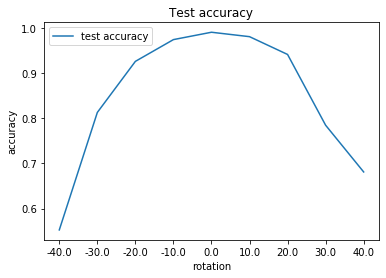

In [ ]:
#  Test "Accuracy" after rotation 
print(rot_test_acc)
plt.plot(rot_test_acc)

plt.title('Test accuracy')
plt.ylabel('accuracy')
plt.xlabel('rotation')
plt.legend(['test accuracy'], loc='upper left')
plt.xticks(np.arange(len(degree_list)), degree_list)



plt.show()



In [ ]:
############ Part 3.2: Checking generalization (Gaussian noise)####################
###################################################################################
batch_size = 128

import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from PIL import Image
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from sklearn.model_selection import train_test_split
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

############# Loaading Data
(X_train_val, y_train_val), (X_test, y_test) = mnist.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.16666666, random_state = 42)

print('train dataset: ', X_train.shape, y_train.shape,X_train[0].shape, y_train)
print('test dataset: ', X_test.shape, y_test.shape,)
print('Validation dataset: ',X_val.shape, y_val.shape,)




############# function for resizing images default 32*32

def resize_image (X, new_size = (32,32)):
    X_resized = []
    for i in range(len(X)):
        
        im = Image.fromarray(X[i])
        im = im.resize(new_size)
        
        X_resized.append(np.asarray(im))
        
    X_resized = np.array(X_resized)
    return (X_resized)



############## Resizing and normalizing
W = 32
H = 32
X_train_resized = resize_image(X_train, new_size = (W,H)) /255
X_test_resized = resize_image(X_test, new_size = (W,H)) /255
X_val_resized = resize_image(X_val, new_size = (W,H)) /255

print(X_train_resized.shape)




############## one-hot-encoding of y labels

nb_classes = 10    # 10 labels 

#y_train_encoded = np.eye(nb_classes)[y_train]
#y_test_encoded = np.eye(nb_classes)[y_test]

y_train_encoded = to_categorical(y_train, nb_classes)
y_test_encoded = to_categorical(y_test, nb_classes)
y_val_encoded = to_categorical(y_val, nb_classes)

print(y_train[0], y_train_encoded[0])





############# Reshaping inputs 


X_train_resized_reshaped = X_train_resized.reshape(50000,W,H,1)
X_val_resized_reshaped = X_val_resized.reshape(10000,W,H,1)

print(X_train_resized.shape)
print(X_train_resized_reshaped.shape)



################ Creating VGG11 CNN ###########################################
def creat_vgg11(nb_classes = 10, W=32, H=32):
  model = Sequential()

  model.add(Conv2D(32, kernel_size=3, padding='same', activation ='relu', input_shape=(W,H,1)))
  model.add(MaxPooling2D(pool_size=(2, 2), strides = 2))

  model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2), strides = 2))

  model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
  model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2), strides = 2))

  model.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))
  model.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2), strides = 2))

  model.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))
  model.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2), strides = 2))

  model.add(Flatten())

  model.add(Dense(512, activation='relu'))
  model.add(Dense(512, activation='relu'))
  model.add(Dense(nb_classes, activation='softmax'))

  return (model)


###############   Train and evaluate the model
X = X_train_resized_reshaped 
X_v = X_val_resized_reshaped 

y = y_train_encoded
y_t = y_test_encoded
y_v = y_val_encoded




def add_noise(X, var):

  X_noised = []
  for image in X:
    row,col= image.shape
    mean = np.mean(image)
    sigma = var**0.5
    gauss = np.random.normal(mean,sigma,(row,col))
    noisy = image + gauss
    X_noised.append(noisy)
  
  X_noised = np.array(X_noised)
  return X_noised






var_list = [0.01, 0.1, 1]
noi_test_acc = []
noi_test_loss = []


for var in var_list:
  X_test_noised = add_noise(X_test_resized, var)
  X_test_noised_reshaped = X_test_noised.reshape(10000,W,H,1)
  X_t = X_test_noised_reshaped


  keras.backend.clear_session()
  CNN = creat_vgg11()
  CNN.compile(loss = 'categorical_crossentropy',
                    optimizer = 'adam', #keras.optimizers.Adadelta(),
                    metrics = ['accuracy'])

  history = CNN.fit(X, y, batch_size = batch_size, epochs = 5,
                verbose = 1, validation_data=(X_v, y_v))




  score = CNN.evaluate(X_t, y_t, verbose=0)
  print('Test loss:', score[0])
  noi_test_loss.append(score[0])

  print('Test accuracy:', score[1])
  noi_test_acc.append(score[1])

Using TensorFlow backend.


Instructions for updating:
non-resource variables are not supported in the long term
11493376/11490434 [==============================] - 2s 0us/step
train dataset:  (50000, 28, 28) (50000,) (28, 28) [8 5 1 ... 0 0 4]
test dataset:  (10000, 28, 28) (10000,)
Validation dataset:  (10000, 28, 28) (10000,)
(50000, 32, 32)
8 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
(50000, 32, 32)
(50000, 32, 32, 1)








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/5





50000/50000 [==============================] - 21s 415us/step - loss: 0.3780 - acc: 0.8719 - val_loss: 0.0905 - val_acc: 0.9730
Epoch 2/5
50000/50000 [==============================] - 12s 242us/step - loss: 0.0671 - acc: 0.9806 - val_loss: 0.0767 - val_acc: 0.9806
Epoch 3/5
50000/50000 [==============================] - 12s 241us/step - loss: 0.0491 - acc: 0.9856 - val_loss: 0.0570 - val_acc: 0.9845
Epoch 4/5
50000/50000 [==============

[0.9895, 0.9298, 0.3147]


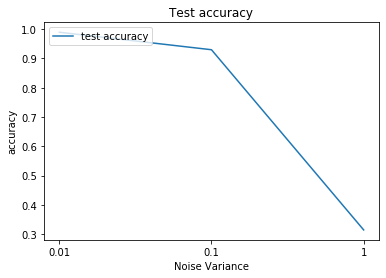

In [ ]:
#  Test "Accuracy" after noise 
print(noi_test_acc)
plt.plot(noi_test_acc)

plt.title('Test accuracy')
plt.ylabel('accuracy')
plt.xlabel('Noise Variance')
plt.legend(['test accuracy'], loc='upper left')
plt.xticks(np.arange(len(var_list)), var_list)

plt.show()

